<div class="alert alert-info">
    <font size="7.5">
<b>
    FIRE-2 Halo Assembly
        </b> 
        </font>
</div>

In [1]:
%matplotlib inline  

In [2]:
# system ----
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tic
from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit

In [3]:
# local ----
simPath = os.path.expanduser("~/_simulations/fire_collab/")
projPath = os.path.expanduser("~/_projects/researchproject_003/")
sys.path.append(simPath)
sys.path.append(projPath+"modules")
import plot_parameters

In [4]:
sys.path.append("../../")
from halo_sample import *
from halo_alpha import *
from halo_trees import *

#print halo_name   
#print halo_mass   
#print halo_rad    
#print star_mass   
#print star_rad    
#print vmax_hyd    
#print vmax_dmo    
#print deltaV2_hyd 
#print deltaV2_dmo 
#print rpow2000    
#print rpow0200    
#print abund       

#print alpha_hyd
#print alpha_dmo
#print ratio500pc

#print tree_halomass
#print tree_starmass
#print tree_scale
#print tree_vmax

import matplotlib
cmap1 = matplotlib.cm.get_cmap('rainbow')
cmap2 = matplotlib.cm.get_cmap('rainbow_r')
cmap3 = matplotlib.cm.get_cmap('viridis')
cmap4 = matplotlib.cm.get_cmap('magma_r')

***

<div class="alert alert-info">
    <font size="6">
<b>
    Table of Contents
        </b> 
        </font>
</div>

- ## [Halo Mass Assembly Histories (MAHs)](#section:MAH)

- ## [Potential Well Growth Histories (PWGHs)](#section:PWGH)

- ## [Stellar Mass Assembly Histories (SMAHs)](#section:SMAH)

- ## [Stellar Abundance Assembly Histories (SMAHs)](#section:SAAH)

- ##  [Relationship with $M_{\star}/M_{\rm halo}$](#section:abund)
    - ###  [MAHs](#subsection:abundMAH)
    - ###  [PWGHs](#subsection:abundPWGH)
    - ###  [SMAHs](#subsection:abundSMAH)
    - ###  [SAAHs](#subsection:abundSAAH)

- ## [Relationship with $\alpha\ [1\% - 2\%] R_{\rm vir}$](#section:alpha)
    - ###  [MAHs](#subsection:alphaMAH)
    - ###  [PWGHs](#subsection:alphaPWGH)
    - ###  [SMAHs](#subsection:alphaSMAH)
    - ###  [SAAHs](#subsection:alphaSAAH)
    
- ## [Relationship with $\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc]$](#section:ratio)
    - ###  [MAHs](#subsection:ratioMAH)
    - ###  [PWGHs](#subsection:ratioPWGH)
    - ###  [SMAHs](#subsection:ratioSMAH)
    - ###  [SAAHs](#subsection:ratioSAAH)
    
- ## [Relationship with $\Delta_{V/2}$](#section:dV2)
    - ###  [MAHs](#subsection:dV2MAH)
    - ###  [PWGHs](#subsection:dV2PWGH)
    - ###  [SMAHs](#subsection:dV2SMAH)
    - ###  [SAAHs](#subsection:dV2SAAH)

- ## [Region of Largest Scatter](#section:scatter)
    - ###  [MAHs](#subsection:scatterMAH)
        - ###  [$\alpha\ [1\% - 2\%] R_{\rm vir}$](#subsection:scatterMAHalpha)
        - ###  [$\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc]$](#subsection:scatterMAHratio)
        - ###  [$\Delta_{V/2}$](#subsection:scatterMAHV2)
    - ###  [PWGHs](#subsection:scatterPWGH)
        - ###  [$\alpha\ [1\% - 2\%] R_{\rm vir}$](#subsection:scatterPWGHalpha)
        - ###  [$\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc]$](#subsection:scatterPWGHratio)
        - ###  [$\Delta_{V/2}$](#subsection:scatterPWGHV2)
    - ###  [SMAHs](#subsection:scatterSMAH)
        - ###  [$\alpha\ [1\% - 2\%] R_{\rm vir}$](#subsection:scatterSMAHalpha)
        - ###  [$\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc]$](#subsection:scatterSMAHratio)
        - ###  [$\Delta_{V/2}$](#subsection:scatterSMAHV2)
    - ###  [SAAHs](#subsection:scatterSAAH)
        - ###  [$\alpha\ [1\% - 2\%] R_{\rm vir}$](#subsection:scatterSAAHalpha)
        - ###  [$\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc]$](#subsection:scatterSAAHratio)
        - ###  [$\Delta_{V/2}$](#subsection:scatterSAAHV2)

***

***

***

<a id='section:MAH'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Halo Mass Assembly Histories (MAHs)
        </b> 
        </font>
</div>

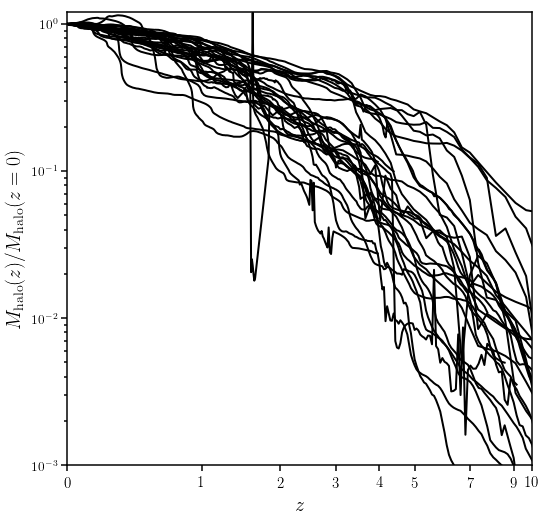

In [71]:
fig = plt.figure(figsize=(10/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        ax.plot(redshift+1., halomass/halomass[0], color='black', zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm halo}(z)/M_{\rm halo}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.show()

In [70]:
mass25 = {}
mass50 = {}
mass75 = {}
color_mass25 = []
color_mass50 = []
color_mass75 = []
for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        ratio = halomass/halomass[0]
        w25 = np.where((0.23 < ratio)&(ratio < 0.27))[0]
        w50 = np.where((0.48 < ratio)&(ratio < 0.52))[0]
        w75 = np.where((0.73 < ratio)&(ratio < 0.77))[0]
        if len(w25) == 0:
            pass
        else:
            mass25[halo] = redshift[max(w25)]
            color_mass25.append(redshift[max(w25)])
        if len(w50) == 0:
            pass
        else:
            mass50[halo] = redshift[max(w50)]
            color_mass50.append(redshift[max(w50)])
        if len(w75) == 0:
            pass
        else:
            mass75[halo] = redshift[max(w75)]
            color_mass75.append(redshift[max(w75)])

color_mass25.sort()
color_mass50.sort()
color_mass75.sort()

***

***

***

<a id='section:PWGH'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Potential Well Growth Histories (PWGHs)
        </b> 
        </font>
</div>

- While it is useful to characterize the halo growth by the halos virial mass $M_{\rm vir}$. Previous literature has shown that halos growth from the inside-out: central regions build-up first and outskirts assemble later. e.g., Fukushige & Makino 2001; Loeb & Peebles 2003; Zhao et al. 2003; Diemand et al. 2007; Cuesta et al. 2008, Boylan-Kolchin et. al 2010, van den Bosch et al. 2016)

- Defining halo boundaries with respect to $\Delta \rho_{c}(z)$ has the halo’s virial mass increase with time, even in the absence of any physical accretion, simply due to the re-definition of the boundary (pseudo-evolution). 

- Thus, a halo can therefore grow substantially in $M_{\rm vir}$ without any appreciable change in the mass at small radii, where the main baryonic component should lie. 

- Accordingly, it is useful to find a way to characterize the build-up of the central regions of halos in addition to studying the growth of $M_{\rm vir}$.

- $R_{\rm max}$ is on average a factor of 6.1 smaller than $R_{\rm vir}$, so $V^{2}_{\rm max}$ probes the mass distribution on a scales∼ 6 times smaller than $R_{\rm vir}$. 

- Additionally, the gravitational potential energy per unit mass of a halo is proportional to $V^{2}_{\rm max}$ , so studying the evolution in V 2 probes the growth of $V^{2}_{\rm max}$ the dark matter halo’s central potential. The dashed curve
in the bottom panel of Fig. 2 show the median relation
while the shaded region shows the ±1 σ scatter. For redshifts
z ≤ 10, the median value of V 2 (z) can be approximated 

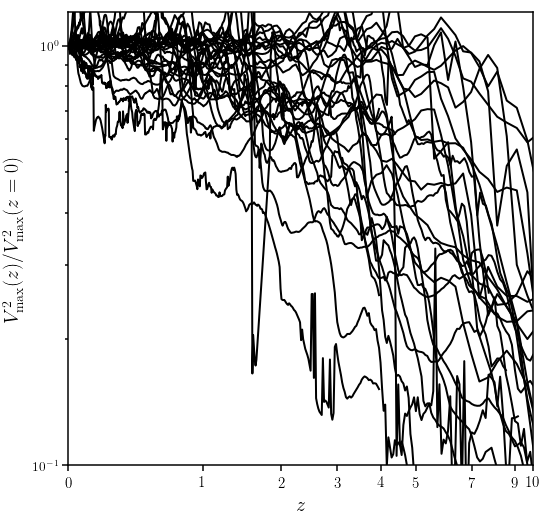

In [7]:
fig = plt.figure(figsize=(10/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        vmax2 = tree_vmax[halo]
        ax.plot(redshift+1., vmax2/vmax2[0], color='black', zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

In [8]:
vmax25 = {}
vmax50 = {}
vmax75 = {}
color_vmax25 = []
color_vmax50 = []
color_vmax75 = []
for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        vmax2 = tree_vmax[halo]
        ratio = vmax2/vmax2[0]
        w25 = np.where((0.23 < ratio)&(ratio < 0.27))[0]
        w50 = np.where((0.48 < ratio)&(ratio < 0.52))[0]
        w75 = np.where((0.73 < ratio)&(ratio < 0.77))[0]
        if len(w25) == 0:
            pass
        else:
            vmax25[halo] = redshift[max(w25)]
            color_vmax25.append(redshift[max(w25)])
        if len(w50) == 0:
            pass
        else:
            vmax50[halo] = redshift[max(w50)]
            color_vmax50.append(redshift[max(w50)])
        if len(w75) == 0:
            pass
        else:
            vmax75[halo] = redshift[max(w75)]
            color_vmax75.append(redshift[max(w75)])
color_vmax25.sort()
color_vmax50.sort()
color_vmax75.sort()

***

***

***

<a id='section:SMAH'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Stellar Mass Assembly Histories (SMAHs)
        </b> 
        </font>
</div>

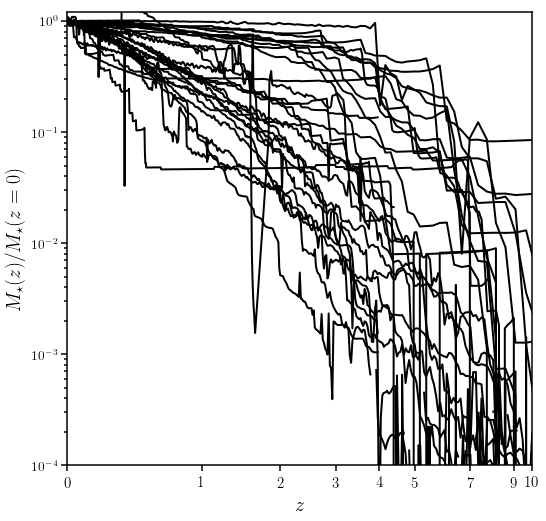

In [9]:
fig = plt.figure(figsize=(10/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        starmass = tree_starmass[halo]
        ax.plot(redshift+1., starmass/starmass[0], color='black', zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

In [10]:
star25 = {}
star50 = {}
star75 = {}
color_star25 = []
color_star50 = []
color_star75 = []
for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        starmass = tree_starmass[halo]
        ratio = starmass/starmass[0]
        w25 = np.where((0.23 < ratio)&(ratio < 0.27))[0]
        w50 = np.where((0.48 < ratio)&(ratio < 0.52))[0]
        w75 = np.where((0.73 < ratio)&(ratio < 0.77))[0]
        if len(w25) == 0:
            pass
        else:
            star25[halo] = redshift[max(w25)]
            color_star25.append(redshift[max(w25)])
        if len(w50) == 0:
            pass
        else:
            star50[halo] = redshift[max(w50)]
            color_star50.append(redshift[max(w50)])
        if len(w75) == 0:
            pass
        else:
            star75[halo] = redshift[max(w75)]
            color_star75.append(redshift[max(w75)])
color_star25.sort()
color_star50.sort()
color_star75.sort()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less


***

***

***

<a id='section:SAAH'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Stellar Abundance Assembly Histories (SAAHs)
        </b> 
        </font>
</div>

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


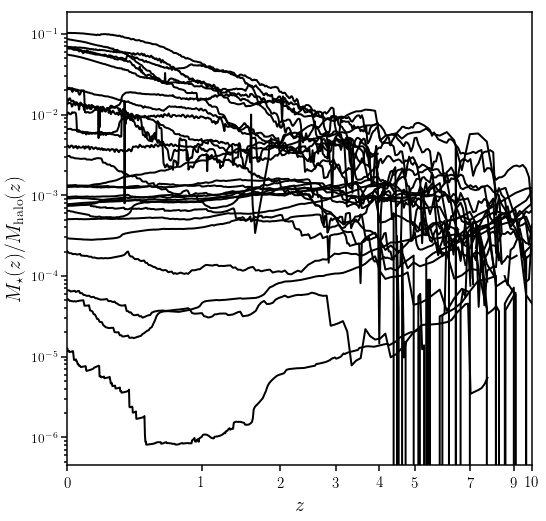

In [11]:
fig = plt.figure(figsize=(10/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        starmass = tree_starmass[halo]
        abund_z  = starmass/halomass
        ax.plot(redshift+1., abund_z, color='black', zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
#ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\rm halo}(z)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.show()

***

***

***

<a id='section:abund'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Relationship with $M_{\star}/M_{\rm halo}$
        </b> 
        </font>
</div> 

In [12]:
color_abund = []
for halo in halo_name:
    color_abund.append(abund[halo])
color_abund.sort()
cmin_abund = min(color_abund)
cmax_abund = max(color_abund)

<a id='subsection:abundMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    MAHs
        </b> 
        </font>
</div> 

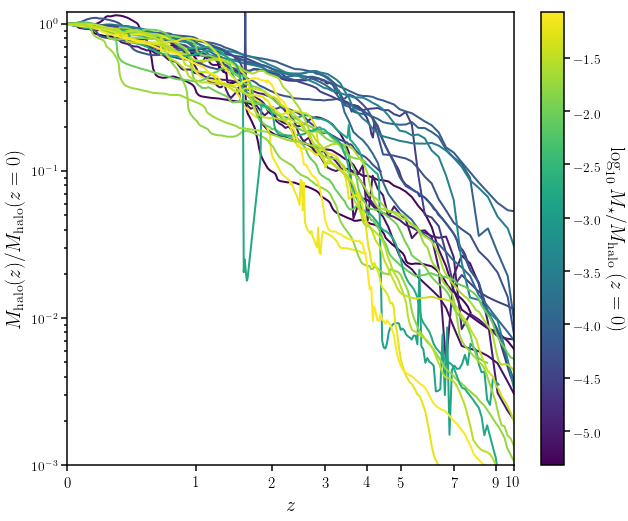

In [13]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        w = np.where(color_abund == abund[halo])[0]
        color_frac = float(w[0])/(len(color_abund)-1)
        ax.plot(redshift+1., halomass/halomass[0], color=cmap3(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm halo}(z)/M_{\rm halo}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap3, vmin=np.log10(cmin_abund), vmax=np.log10(cmax_abund))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10} M_{\star}/M_{\rm halo}\ (z=0) $', fontsize=20, labelpad=20, rotation=270)

plt.show()

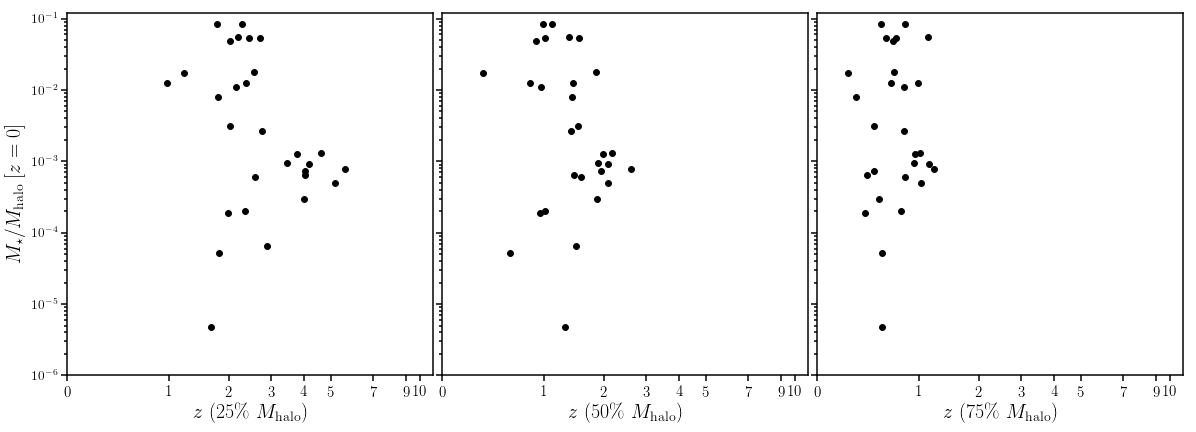

In [14]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(24/1.2,8/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        try:
            mass25[halo]
        except KeyError:
            pass
        else:
            ax1.scatter(mass25[halo]+1., abund[halo], s=35, color='black', zorder=1)
        try:
            mass50[halo]
        except KeyError:
            pass
        else:
            ax2.scatter(mass50[halo]+1., abund[halo], s=35, color='black', zorder=1)
        try:
            mass75[halo]
        except KeyError:
            pass
        else:
            ax3.scatter(mass75[halo]+1., abund[halo], s=35, color='black', zorder=1)   
    
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1, 12)
ax2.set_xlim(1, 12)
ax3.set_xlim(1, 12)
ax1.set_ylim(1e-6,0.12)
ax2.set_ylim(1e-6,0.12)
ax3.set_ylim(1e-6,0.12)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$z\ (25\%\ M_{\rm halo})$", fontsize=20)
ax2.set_xlabel(r"$z\ (50\%\ M_{\rm halo})$", fontsize=20)
ax3.set_xlabel(r"$z\ (75\%\ M_{\rm halo})$", fontsize=20)
ax1.set_ylabel(r"$M_{\star}/M_{\rm halo}\ [z=0] $", fontsize=20)

ax1.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax1.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax1.tick_params(axis='x', which='minor', bottom=False, top=False)

ax2.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax2.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax2.tick_params(axis='x', which='minor', bottom=False, top=False)

ax3.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax3.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax3.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.show()

<a id='subsection:abundPWGH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    PWGHs
        </b> 
        </font>
</div> 

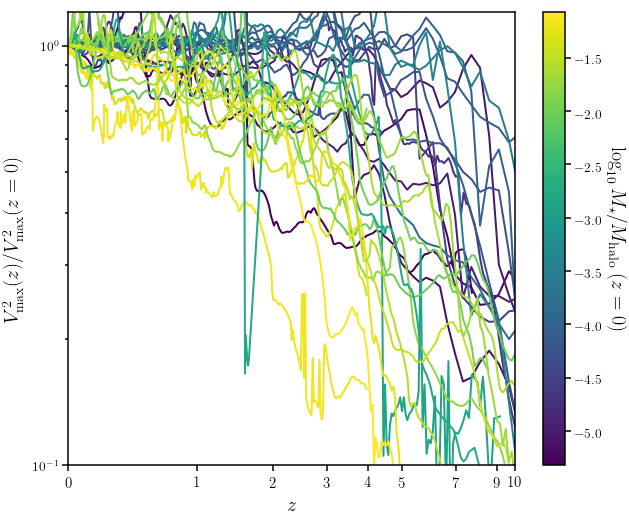

In [15]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        vmax2 = tree_vmax[halo]
        w = np.where(color_abund == abund[halo])[0]
        color_frac = float(w[0])/(len(color_abund)-1)
        ax.plot(redshift+1., vmax2/vmax2[0], color=cmap3(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap3, vmin=np.log10(cmin_abund), vmax=np.log10(cmax_abund))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10} M_{\star}/M_{\rm halo}\ (z=0) $', fontsize=20, labelpad=20, rotation=270)

plt.show()

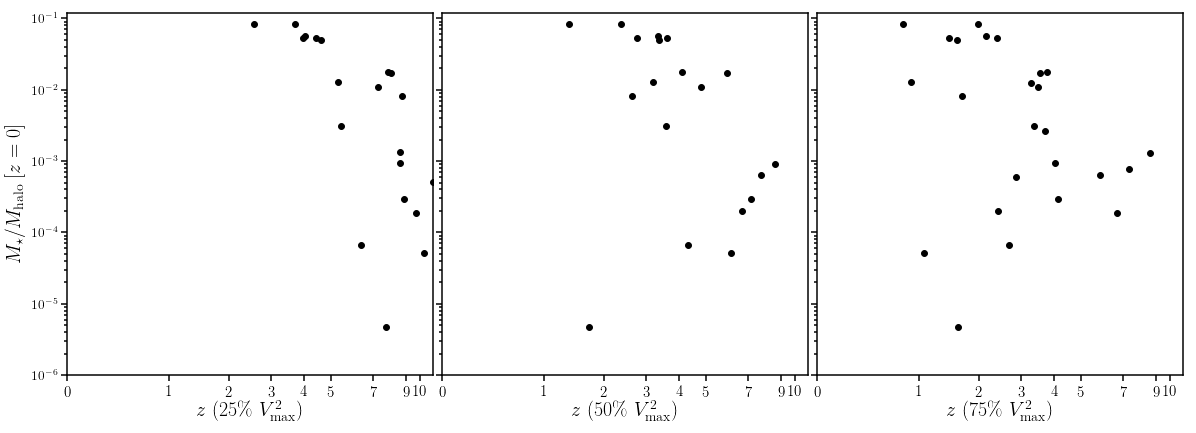

In [16]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(24/1.2,8/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        try:
            vmax25[halo]
        except KeyError:
            pass
        else:
            ax1.scatter(vmax25[halo]+1., abund[halo], s=35, color='black', zorder=1)
        try:
            vmax50[halo]
        except KeyError:
            pass
        else:
            ax2.scatter(vmax50[halo]+1., abund[halo], s=35, color='black', zorder=1)
        try:
            vmax75[halo]
        except KeyError:
            pass
        else:
            ax3.scatter(vmax75[halo]+1., abund[halo], s=35, color='black', zorder=1)
    
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1, 12)
ax2.set_xlim(1, 12)
ax3.set_xlim(1, 12)
ax1.set_ylim(1e-6,0.12)
ax2.set_ylim(1e-6,0.12)
ax3.set_ylim(1e-6,0.12)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$z\ (25\%\ V_{\rm max}^{2} )$", fontsize=20)
ax2.set_xlabel(r"$z\ (50\%\ V_{\rm max}^{2} )$", fontsize=20)
ax3.set_xlabel(r"$z\ (75\%\ V_{\rm max}^{2} )$", fontsize=20)
ax1.set_ylabel(r"$M_{\star}/M_{\rm halo}\ [z=0] $", fontsize=20)

ax1.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax1.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax1.tick_params(axis='x', which='minor', bottom=False, top=False)

ax2.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax2.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax2.tick_params(axis='x', which='minor', bottom=False, top=False)

ax3.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax3.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax3.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.show()

<a id='subsection:abundSMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SMAHs
        </b> 
        </font>
</div> 

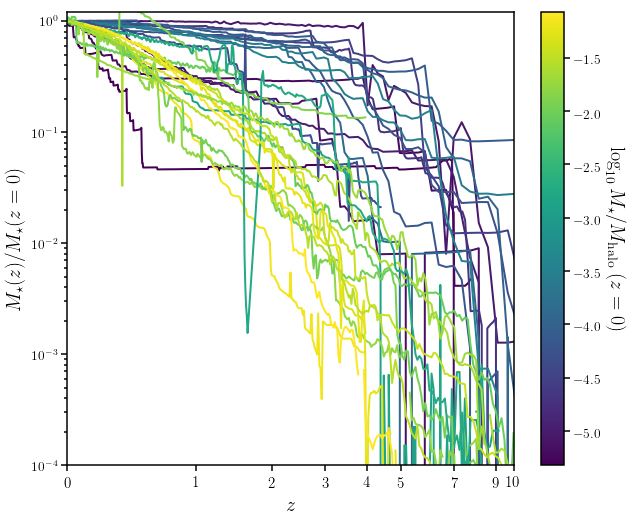

In [17]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        starmass = tree_starmass[halo]
        w = np.where(color_abund == abund[halo])[0]
        color_frac = float(w[0])/(len(color_abund)-1)
        ax.plot(redshift+1., starmass/starmass[0], color=cmap3(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap3, vmin=np.log10(cmin_abund), vmax=np.log10(cmax_abund))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10} M_{\star}/M_{\rm halo}\ (z=0) $', fontsize=20, labelpad=20, rotation=270)

plt.show()

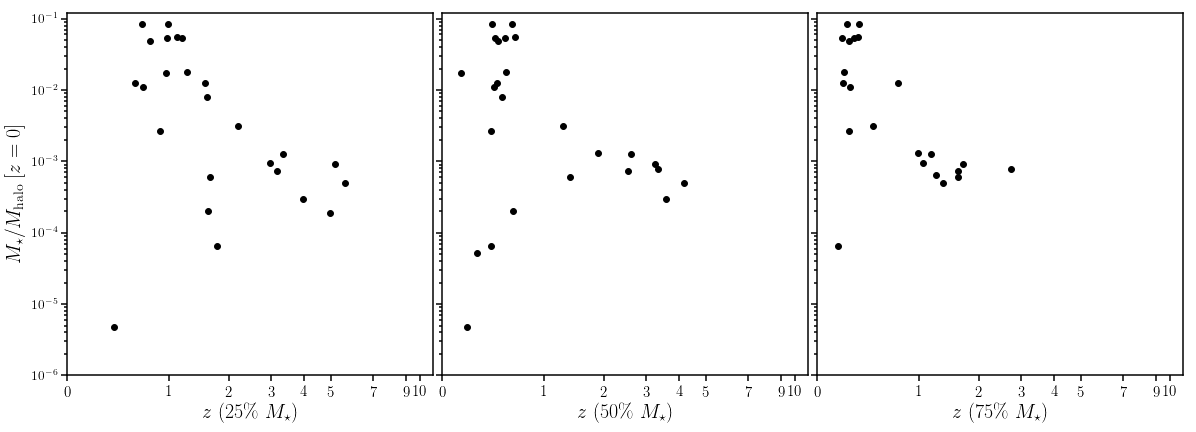

In [18]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(24/1.2,8/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        try:
            star25[halo]
        except KeyError:
            pass
        else:
            ax1.scatter(star25[halo]+1., abund[halo], s=35, color='black', zorder=1)
        try:
            star50[halo]
        except KeyError:
            pass
        else:
            ax2.scatter(star50[halo]+1., abund[halo], s=35, color='black', zorder=1)
        try:
            star75[halo]
        except KeyError:
            pass
        else:
            ax3.scatter(star75[halo]+1., abund[halo], s=35, color='black', zorder=1)
    
ax1.set_xscale('log')
ax2.set_xscale('log')
ax3.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1, 12)
ax2.set_xlim(1, 12)
ax3.set_xlim(1, 12)
ax1.set_ylim(1e-6,0.12)
ax2.set_ylim(1e-6,0.12)
ax3.set_ylim(1e-6,0.12)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$z\ (25\%\ M_{\star})$", fontsize=20)
ax2.set_xlabel(r"$z\ (50\%\ M_{\star})$", fontsize=20)
ax3.set_xlabel(r"$z\ (75\%\ M_{\star})$", fontsize=20)
ax1.set_ylabel(r"$M_{\star}/M_{\rm halo}\ [z=0] $", fontsize=20)

ax1.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax1.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax1.tick_params(axis='x', which='minor', bottom=False, top=False)

ax2.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax2.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax2.tick_params(axis='x', which='minor', bottom=False, top=False)

ax3.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax3.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax3.tick_params(axis='x', which='minor', bottom=False, top=False)

plt.show()

***

***

***

<a id='section:alpha'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Relationship with $\alpha\ [1-2 \%]\ \mathrm{Rvir}$
        </b> 
        </font>
</div> 

In [19]:
color_alpha = []
for halo in halo_name:
    color_alpha.append(alpha_hyd[halo])
color_alpha.sort()
cmin_alpha = min(color_alpha)
cmax_alpha = max(color_alpha)

<a id='subsection:alphaMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    MAHs
        </b> 
        </font>
</div> 

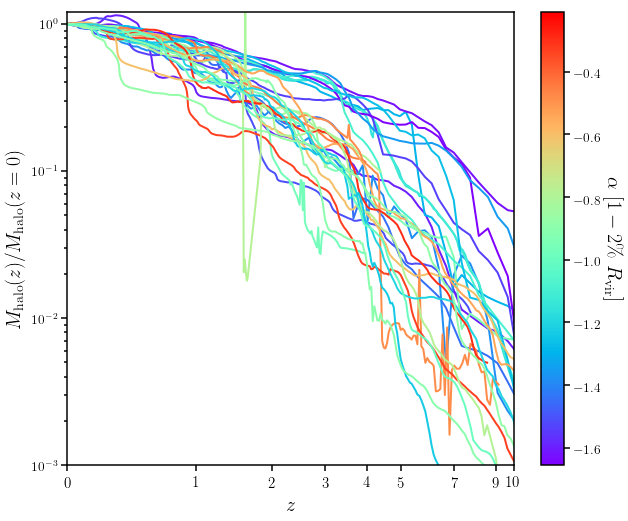

In [20]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        w = np.where(color_alpha == alpha_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_alpha)-1)
        ax.plot(redshift+1., halomass/halomass[0], color=cmap1(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm halo}(z)/M_{\rm halo}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

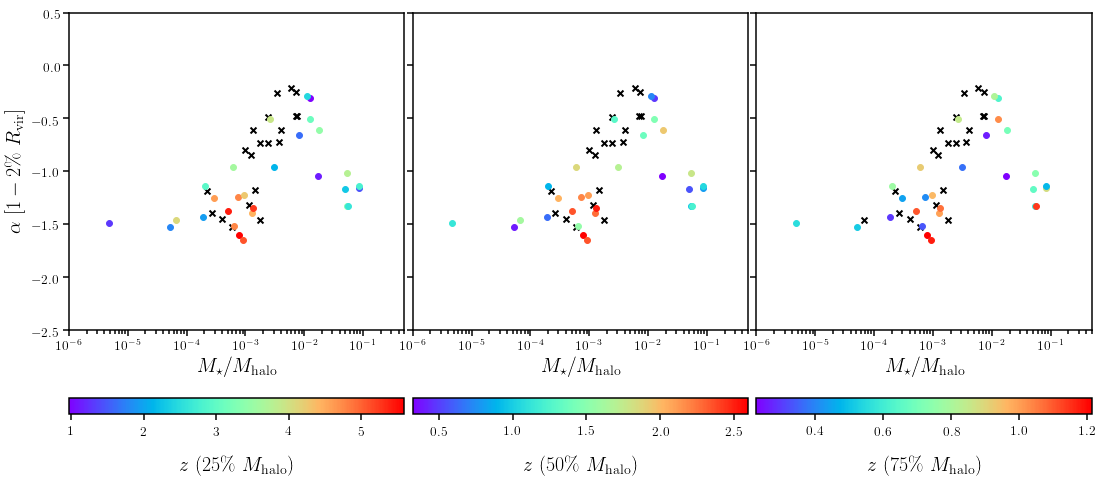

In [21]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        mass25[halo]
    except KeyError:
        ax1.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_mass25 == mass25[halo])[0]
        color_frac25 = float(w25[0])/(len(mass25)-1)
        ax1.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac25), zorder=1)
    try:
        mass50[halo]
    except KeyError:
        ax2.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_mass50 == mass50[halo])[0]
        color_frac50 = float(w50[0])/(len(mass50)-1)
        ax2.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac50), zorder=1)  
    try:
        mass75[halo]
    except KeyError:
        ax3.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_mass75 == mass75[halo])[0]
        color_frac75 = float(w75[0])/(len(mass75)-1)
        ax3.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac75), zorder=1)
    
ax1.set_xscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(-2.5, 0.5)
ax2.set_ylim(-2.5, 0.5)
ax3.set_ylim(-2.5, 0.5)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$\alpha\ [1-2\%\ R_{\rm vir}] $", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_mass25), vmax=max(color_mass25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_mass50), vmax=max(color_mass50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_mass75), vmax=max(color_mass75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:alphaPWGH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    PWGHs
        </b> 
        </font>
</div> 

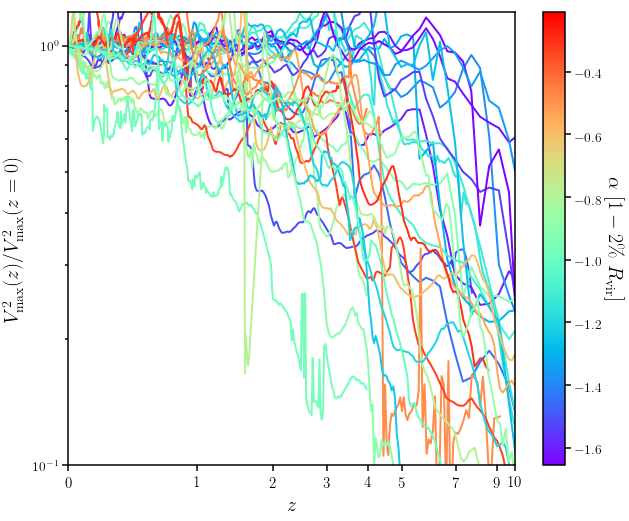

In [22]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        w = np.where(color_alpha == alpha_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_alpha)-1)
        vmax2 = tree_vmax[halo]
        ax.plot(redshift+1., vmax2/vmax2[0], color=cmap1(color_frac), zorder=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

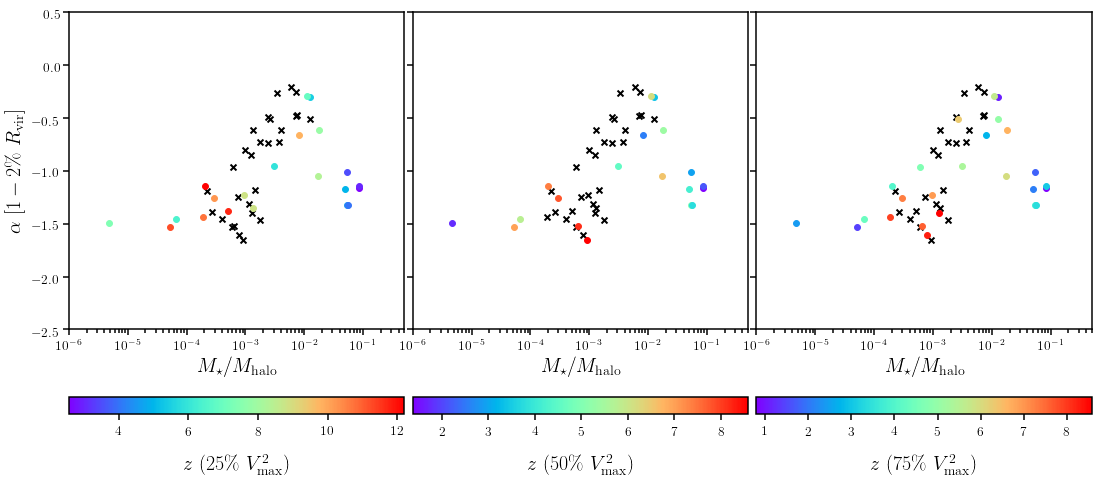

In [23]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        vmax25[halo]
    except KeyError:
        ax1.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_vmax25 == vmax25[halo])[0]
        color_frac25 = float(w25[0])/(len(vmax25)-1)
        ax1.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac25), zorder=1)
    try:
        vmax50[halo]
    except KeyError:
        ax2.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_vmax50 == vmax50[halo])[0]
        color_frac50 = float(w50[0])/(len(vmax50)-1)
        ax2.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac50), zorder=1)  
    try:
        vmax75[halo]
    except KeyError:
        ax3.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_vmax75 == vmax75[halo])[0]
        color_frac75 = float(w75[0])/(len(vmax75)-1)
        ax3.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac75), zorder=1)
    
ax1.set_xscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(-2.5, 0.5)
ax2.set_ylim(-2.5, 0.5)
ax3.set_ylim(-2.5, 0.5)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$\alpha\ [1-2\%\ R_{\rm vir}] $", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_vmax25), vmax=max(color_vmax25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_vmax50), vmax=max(color_vmax50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_vmax75), vmax=max(color_vmax75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:alphaSMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SMAHs
        </b> 
        </font>
</div> 

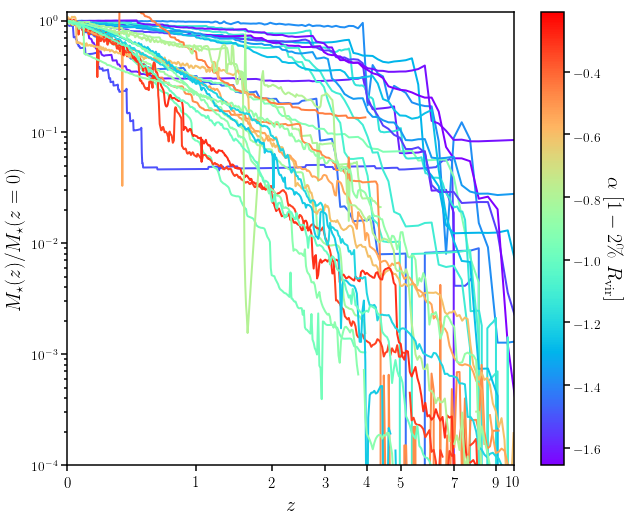

In [24]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        starmass = tree_starmass[halo]
        w = np.where(color_alpha == alpha_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_alpha)-1)
        ax.plot(redshift+1., starmass/starmass[0], color=cmap1(color_frac), zorder=1)

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

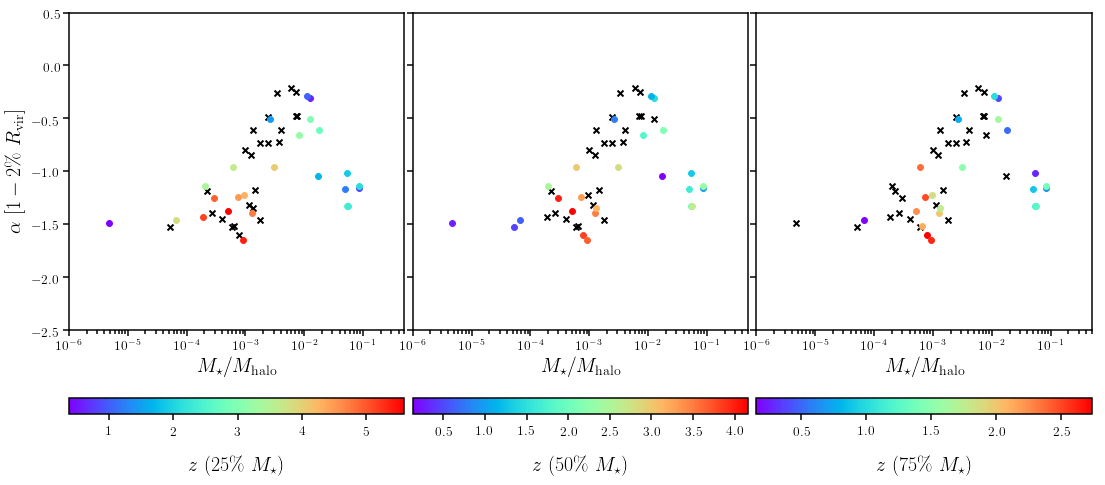

In [25]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        star25[halo]
    except KeyError:
        ax1.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_star25 == star25[halo])[0]
        color_frac25 = float(w25[0])/(len(star25)-1)
        ax1.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac25), zorder=1)
    try:
        star50[halo]
    except KeyError:
        ax2.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_star50 == star50[halo])[0]
        color_frac50 = float(w50[0])/(len(star50)-1)
        ax2.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac50), zorder=1)  
    try:
        star75[halo]
    except KeyError:
        ax3.scatter(abund[halo], alpha_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_star75 == star75[halo])[0]
        color_frac75 = float(w75[0])/(len(star75)-1)
        ax3.scatter(abund[halo], alpha_hyd[halo], s=35, color=cmap1(color_frac75), zorder=1)
    
ax1.set_xscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(-2.5, 0.5)
ax2.set_ylim(-2.5, 0.5)
ax3.set_ylim(-2.5, 0.5)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$\alpha\ [1-2\%\ R_{\rm vir}] $", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_star25), vmax=max(color_star25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_star50), vmax=max(color_star50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap1, vmin=min(color_star75), vmax=max(color_star75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:alphaSAAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SAAHs
        </b> 
        </font>
</div> 

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


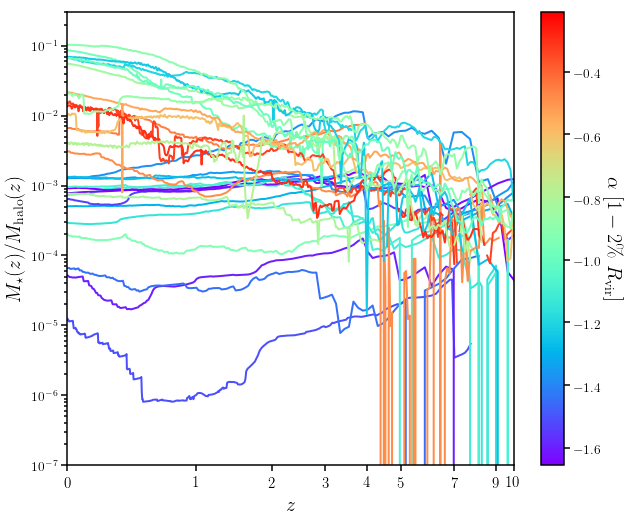

In [26]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        starmass = tree_starmass[halo]
        abund_z  = starmass/halomass
        w = np.where(color_alpha == alpha_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_alpha)-1)
        ax.plot(redshift+1., abund_z, color=cmap1(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-7,3e-1)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\rm halo}(z)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

***

***

***

<a id='section:ratio'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Relationship with  $\rho_{\rm hydro}/ \rho_{\rm dmo}\ [500\ \rm pc]$
        </b> 
        </font>
</div> 

In [27]:
color_ratio = []
for halo in halo_name:
    color_ratio.append(ratio500pc[halo])
color_ratio.sort()
cmin_ratio = min(color_ratio)
cmax_ratio = max(color_ratio)

<a id='subsection:ratioMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    MAHs
        </b> 
        </font>
</div> 

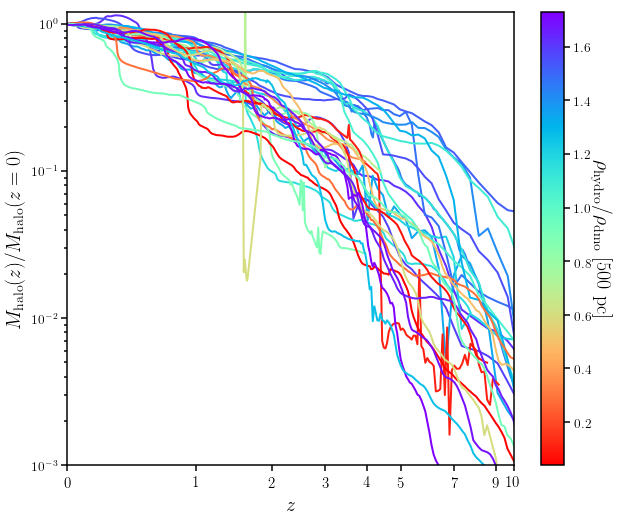

In [28]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        w = np.where(color_ratio == ratio500pc[halo])[0]
        color_frac = float(w[0])/(len(color_ratio)-1)
        ax.plot(redshift+1., halomass/halomass[0], color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm halo}(z)/M_{\rm halo}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

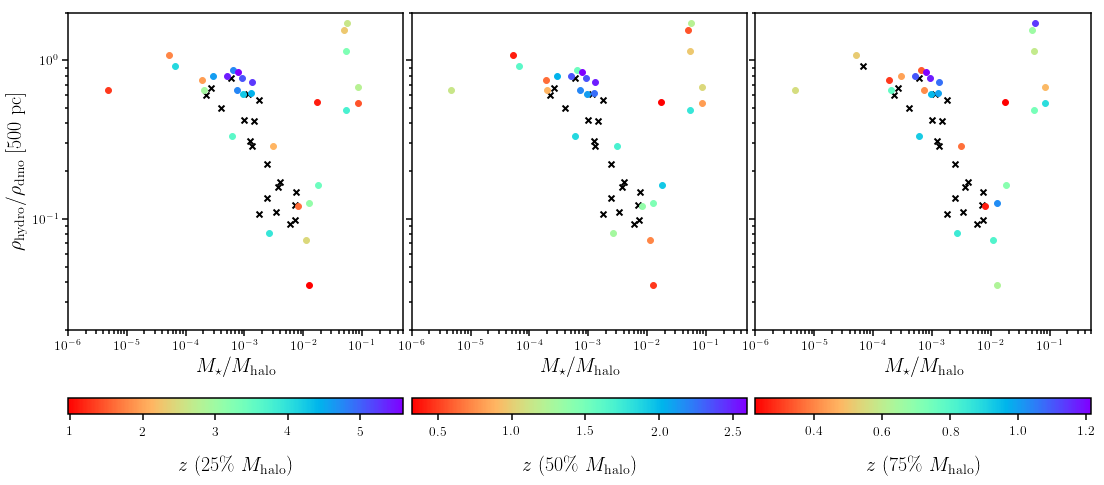

In [29]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        mass25[halo]
    except KeyError:
        ax1.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_mass25 == mass25[halo])[0]
        color_frac25 = float(w25[0])/(len(mass25)-1)
        ax1.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap2(color_frac25), zorder=1)
    try:
        mass50[halo]
    except KeyError:
        ax2.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_mass50 == mass50[halo])[0]
        color_frac50 = float(w50[0])/(len(mass50)-1)
        ax2.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap2(color_frac50), zorder=1)  
    try:
        mass75[halo]
    except KeyError:
        ax3.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_mass75 == mass75[halo])[0]
        color_frac75 = float(w75[0])/(len(mass75)-1)
        ax3.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap2(color_frac75), zorder=1)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(2e-2, 2)
ax2.set_ylim(2e-2, 2)
ax3.set_ylim(2e-2, 2)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc] $", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_mass25), vmax=max(color_mass25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_mass50), vmax=max(color_mass50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_mass75), vmax=max(color_mass75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:ratioPWGH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    PWGHs
        </b> 
        </font>
</div> 

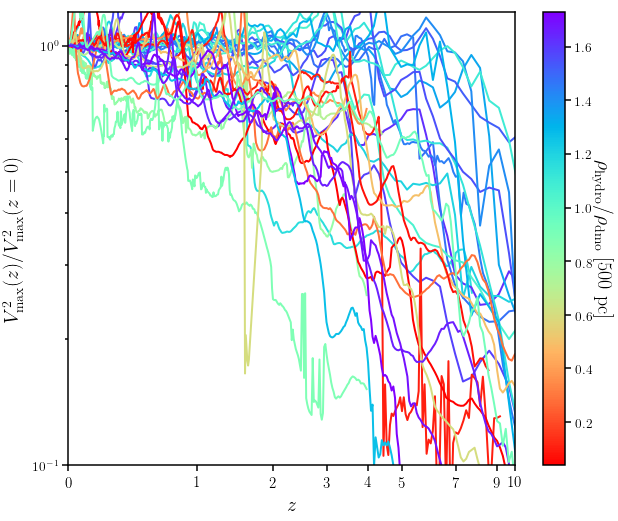

In [30]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        vmax2 = tree_vmax[halo]
        w = np.where(color_ratio == ratio500pc[halo])[0]
        color_frac = float(w[0])/(len(color_ratio)-1)
        ax.plot(redshift+1., vmax2/vmax2[0], color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

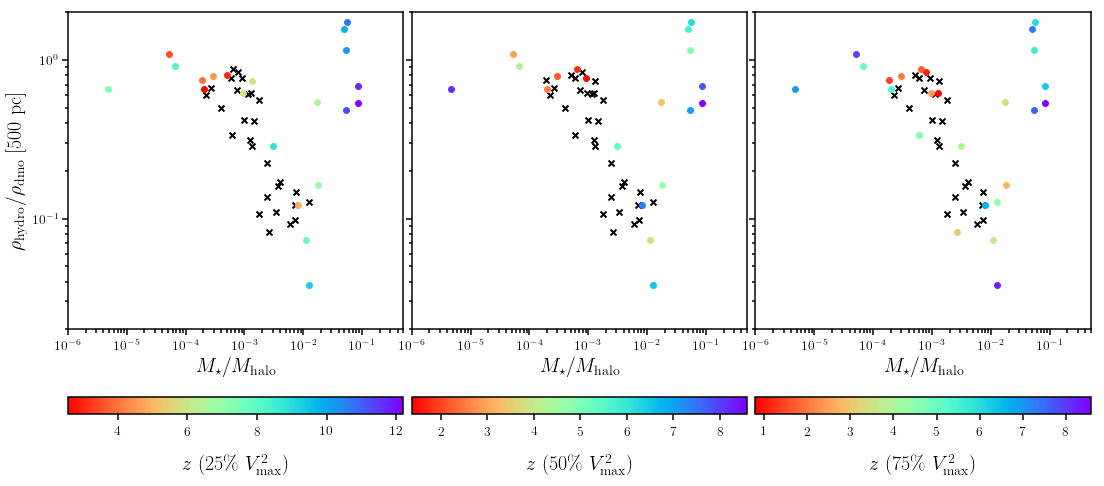

In [31]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        vmax25[halo]
    except KeyError:
        ax1.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_vmax25 == vmax25[halo])[0]
        color_frac25 = float(w25[0])/(len(vmax25)-1)
        ax1.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap1(color_frac25), zorder=1)
    try:
        vmax50[halo]
    except KeyError:
        ax2.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_vmax50 == vmax50[halo])[0]
        color_frac50 = float(w50[0])/(len(vmax50)-1)
        ax2.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap1(color_frac50), zorder=1)  
    try:
        vmax75[halo]
    except KeyError:
        ax3.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_vmax75 == vmax75[halo])[0]
        color_frac75 = float(w75[0])/(len(vmax75)-1)
        ax3.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap1(color_frac75), zorder=1)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(2e-2, 2)
ax2.set_ylim(2e-2, 2)
ax3.set_ylim(2e-2, 2)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc] $", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_vmax25), vmax=max(color_vmax25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_vmax50), vmax=max(color_vmax50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_vmax75), vmax=max(color_vmax75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:ratioSMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SMAHs
        </b> 
        </font>
</div> 

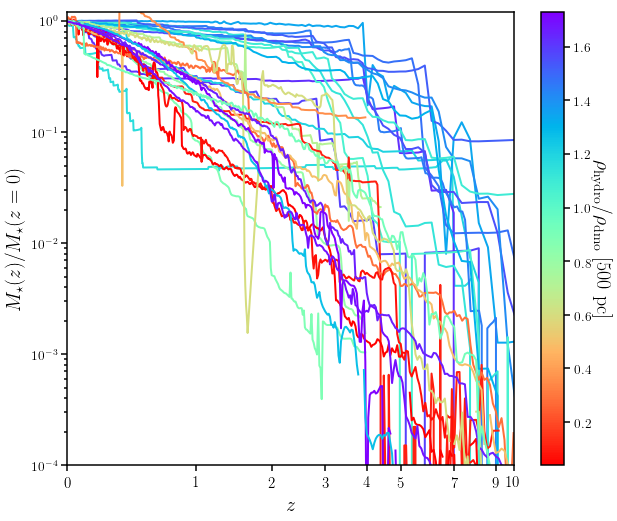

In [32]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        starmass = tree_starmass[halo]
        w = np.where(color_ratio == ratio500pc[halo])[0]
        color_frac = float(w[0])/(len(color_ratio)-1)
        ax.plot(redshift+1., starmass/starmass[0], color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

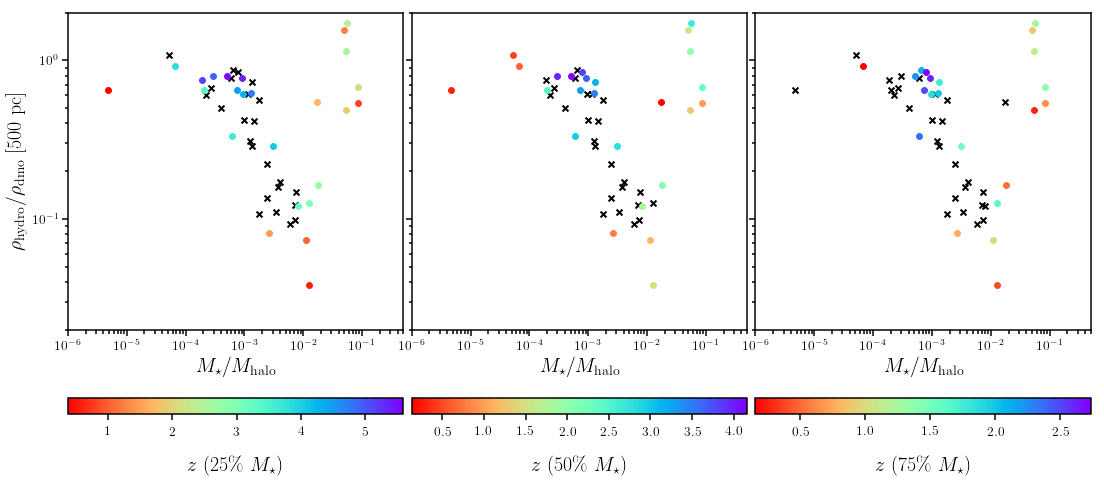

In [33]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        star25[halo]
    except KeyError:
        ax1.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_star25 == star25[halo])[0]
        color_frac25 = float(w25[0])/(len(star25)-1)
        ax1.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap2(color_frac25), zorder=1)
    try:
        star50[halo]
    except KeyError:
        ax2.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_star50 == star50[halo])[0]
        color_frac50 = float(w50[0])/(len(star50)-1)
        ax2.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap2(color_frac50), zorder=1)  
    try:
        star75[halo]
    except KeyError:
        ax3.scatter(abund[halo], ratio500pc[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_star75 == star75[halo])[0]
        color_frac75 = float(w75[0])/(len(star75)-1)
        ax3.scatter(abund[halo], ratio500pc[halo], s=35, color=cmap2(color_frac75), zorder=1)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(2e-2, 2)
ax2.set_ylim(2e-2, 2)
ax3.set_ylim(2e-2, 2)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$\rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc] $", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_star25), vmax=max(color_star25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_star50), vmax=max(color_star50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_star75), vmax=max(color_star75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


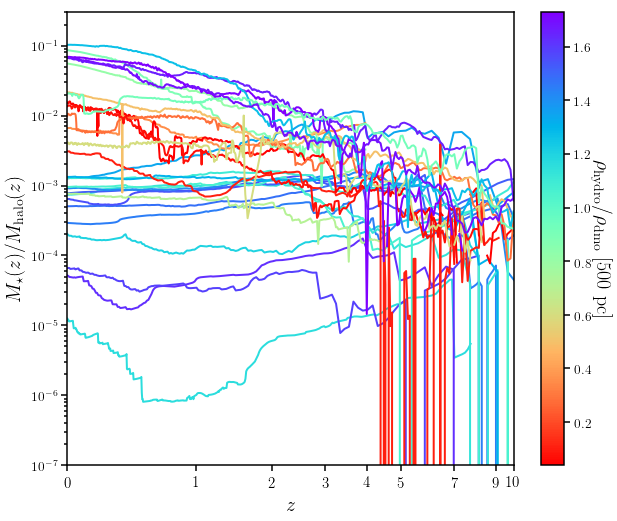

In [34]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        starmass = tree_starmass[halo]
        abund_z  = starmass/halomass
        w = np.where(color_ratio == ratio500pc[halo])[0]
        color_frac = float(w[0])/(len(color_ratio)-1)
        ax.plot(redshift+1., abund_z, color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-7,3e-1)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\rm halo}(z)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [500\ \rm pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

***

***

***

<a id='section:dV2'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Relationship with $\Delta_{V/2}$
        </b> 
        </font>
</div>  

In [35]:
color_dV2 = []
for halo in halo_name:
    color_dV2.append(deltaV2_hyd[halo])
color_dV2.sort()
cmin_dV2 = min(color_dV2)
cmax_dV2 = max(color_dV2)

<a id='subsection:dV2MAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    MAHs
        </b> 
        </font>
</div> 

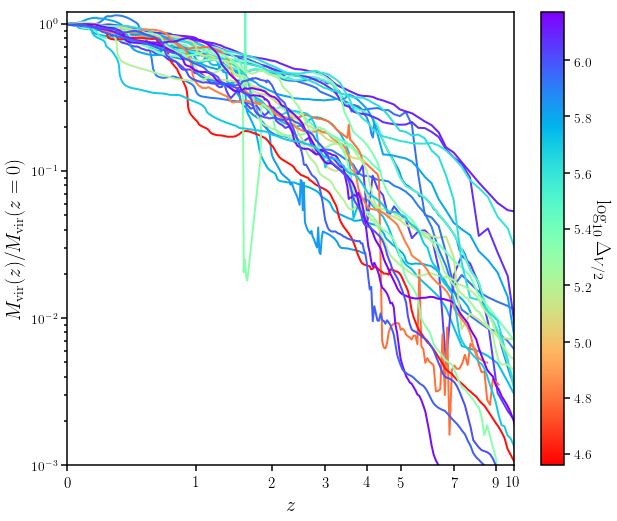

In [36]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_dV2)-1)
        ax.plot(redshift+1., halomass/halomass[0], color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm vir}(z)/M_{\rm vir}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

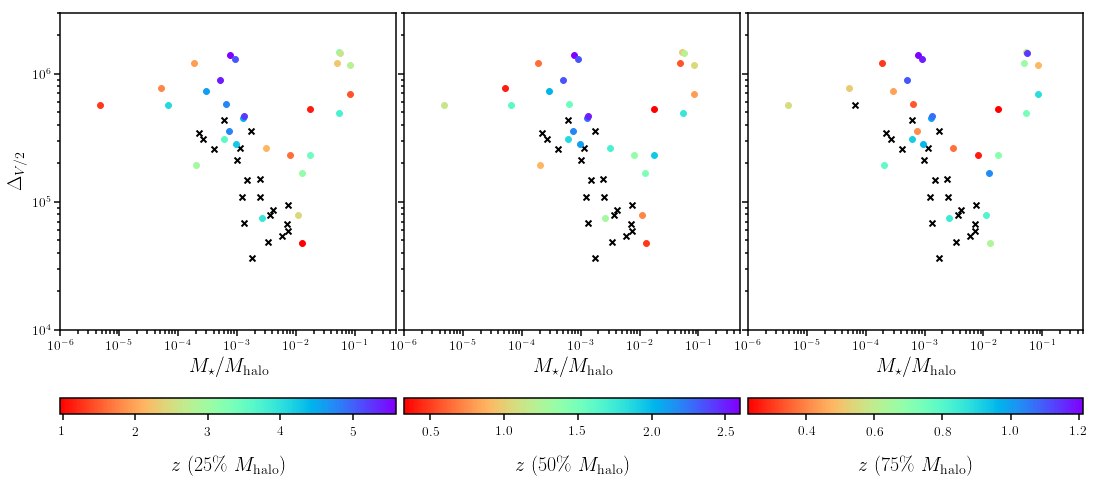

In [37]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        mass25[halo]
    except KeyError:
        ax1.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_mass25 == mass25[halo])[0]
        color_frac25 = float(w25[0])/(len(mass25)-1)
        ax1.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap2(color_frac25), zorder=1)
    try:
        mass50[halo]
    except KeyError:
        ax2.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_mass50 == mass50[halo])[0]
        color_frac50 = float(w50[0])/(len(mass50)-1)
        ax2.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap2(color_frac50), zorder=1)  
    try:
        mass75[halo]
    except KeyError:
        ax3.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_mass75 == mass75[halo])[0]
        color_frac75 = float(w75[0])/(len(mass75)-1)
        ax3.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap2(color_frac75), zorder=1)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(1e+4, 3e+6)
ax2.set_ylim(1e+4, 3e+6)
ax3.set_ylim(1e+4, 3e+6)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$ \Delta_{V/2}$", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_mass25), vmax=max(color_mass25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_mass50), vmax=max(color_mass50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_mass75), vmax=max(color_mass75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ M_{\rm halo})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:dV2PWGH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    PWGHs
        </b> 
        </font>
</div> 

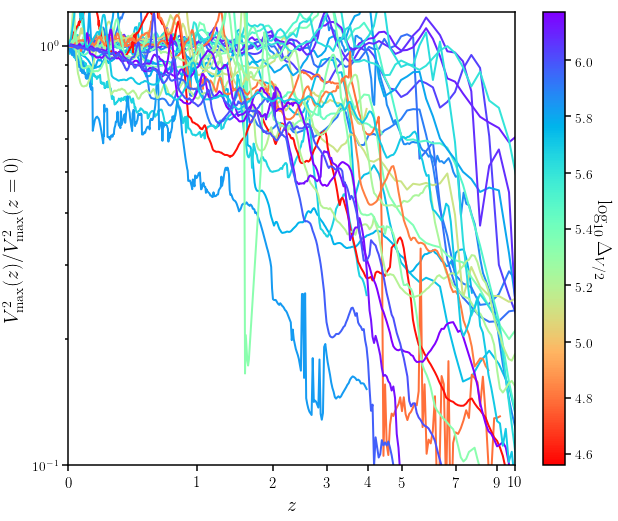

In [38]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        vmax2 = tree_vmax[halo]
        w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_dV2)-1)
        ax.plot(redshift+1., vmax2/vmax2[0], color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

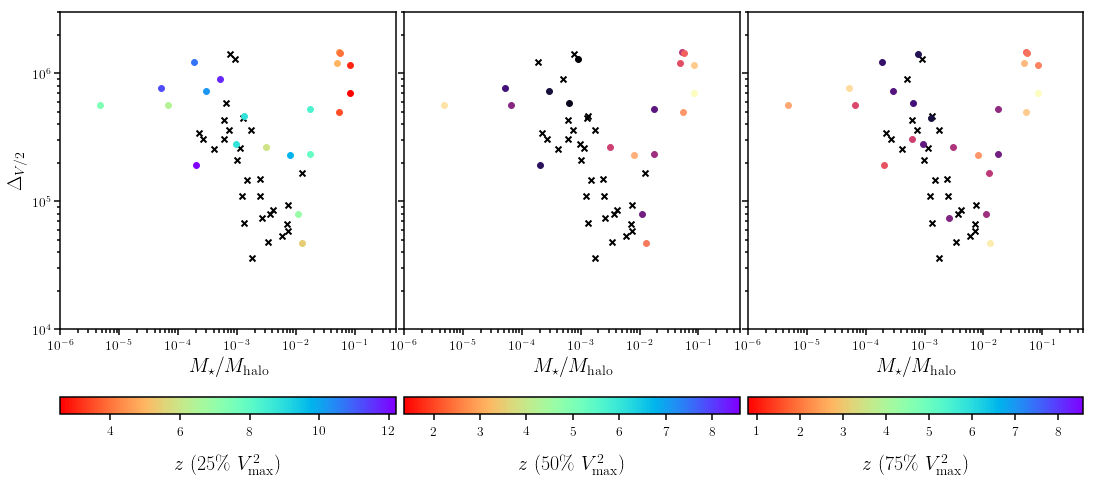

In [39]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        vmax25[halo]
    except KeyError:
        ax1.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_vmax25 == vmax25[halo])[0]
        color_frac25 = float(w25[0])/(len(vmax25)-1)
        ax1.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap2(color_frac25), zorder=1)
    try:
        vmax50[halo]
    except KeyError:
        ax2.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_vmax50 == vmax50[halo])[0]
        color_frac50 = float(w50[0])/(len(vmax50)-1)
        ax2.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap4(color_frac50), zorder=1)  
    try:
        vmax75[halo]
    except KeyError:
        ax3.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_vmax75 == vmax75[halo])[0]
        color_frac75 = float(w75[0])/(len(mass75)-1)
        ax3.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap4(color_frac75), zorder=1)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(1e+4, 3e+6)
ax2.set_ylim(1e+4, 3e+6)
ax3.set_ylim(1e+4, 3e+6)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$ \Delta_{V/2}$", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_vmax25), vmax=max(color_vmax25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_vmax50), vmax=max(color_vmax50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_vmax75), vmax=max(color_vmax75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ V_{\rm max}^{2})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:dV2SMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SMAHs
        </b> 
        </font>
</div> 

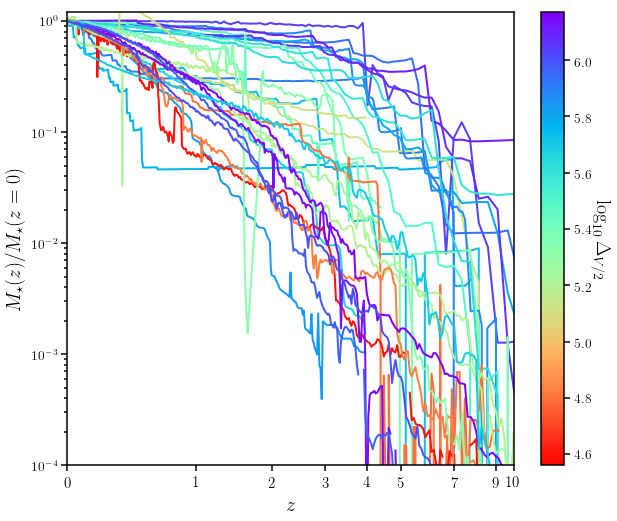

In [40]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        starmass = tree_starmass[halo]
        w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_dV2)-1)
        ax.plot(redshift+1., starmass/starmass[0], color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

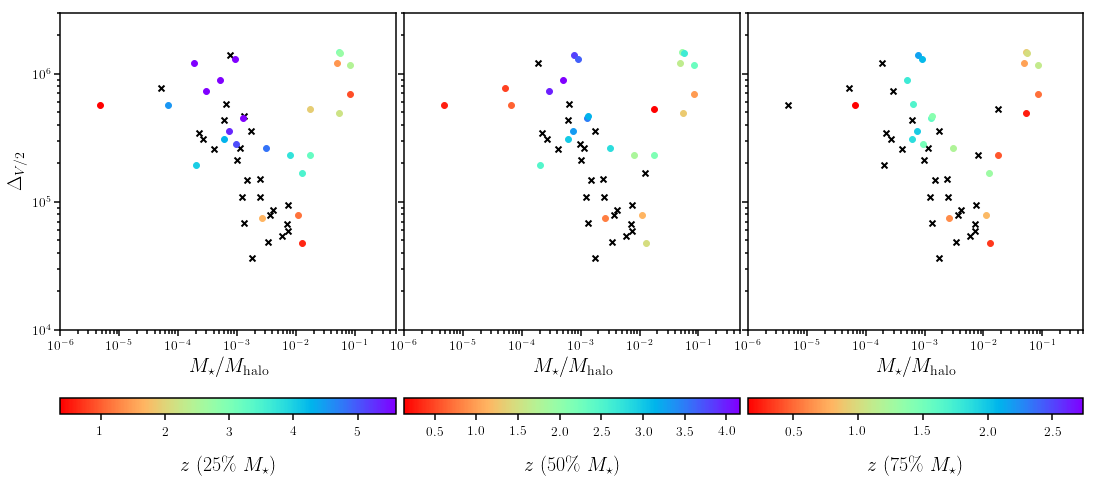

In [41]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(22/1.2,10/1.2))
gs = gridspec.GridSpec(1, 3)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax3 = fig.add_subplot(gs[2], sharex=ax1, sharey=ax2)
gs.update(wspace=0.025)

for halo in halo_name:
    try:
        star25[halo]
    except KeyError:
        ax1.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w25 = np.where(color_star25 == star25[halo])[0]
        color_frac25 = float(w25[0])/(len(vmax25)-1)
        ax1.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap2(color_frac25), zorder=1)
    try:
        star50[halo]
    except KeyError:
        ax2.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:
        w50 = np.where(color_star50 == star50[halo])[0]
        color_frac50 = float(w50[0])/(len(star50)-1)
        ax2.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap2(color_frac50), zorder=1)  
    try:
        star75[halo]
    except KeyError:
        ax3.scatter(abund[halo], deltaV2_hyd[halo], s=35, color='black', marker='x', zorder=0)
    else:        
        w75 = np.where(color_star75 == star75[halo])[0]
        color_frac75 = float(w75[0])/(len(mass75)-1)
        ax3.scatter(abund[halo], deltaV2_hyd[halo], s=35, color=cmap2(color_frac75), zorder=1)
    
ax1.set_xscale('log')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')

ax1.set_xlim(1e-6, 0.5)
ax1.set_ylim(1e+4, 3e+6)
ax2.set_ylim(1e+4, 3e+6)
ax3.set_ylim(1e+4, 3e+6)

ax2.get_yaxis().set_ticklabels([])
ax3.get_yaxis().set_ticklabels([])
 
ax1.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax2.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax3.set_xlabel(r"$M_{\star}/M_{\rm halo}$", fontsize=20)
ax1.set_ylabel(r"$ \Delta_{V/2}$", fontsize=20)

clr1 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_star25), vmax=max(color_star25))
clr2 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_star50), vmax=max(color_star50))
clr3 = ax1.scatter(100,100,c=100, cmap=cmap2, vmin=min(color_star75), vmax=max(color_star75))

cbar1 = fig.colorbar(clr1, ax=ax1, orientation="horizontal")
cbar2 = fig.colorbar(clr2, ax=ax2, orientation="horizontal")
cbar3 = fig.colorbar(clr3, ax=ax3, orientation="horizontal")
cbar1.ax.set_xlabel(r'$ z\ (25\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)
cbar2.ax.set_xlabel(r'$ z\ (50\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)
cbar3.ax.set_xlabel(r'$ z\ (75\%\ M_{\star})$', fontsize=20, labelpad=20, rotation=0)

plt.show()

<a id='subsection:dV2SAAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SAAHs
        </b> 
        </font>
</div> 

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in divide
  


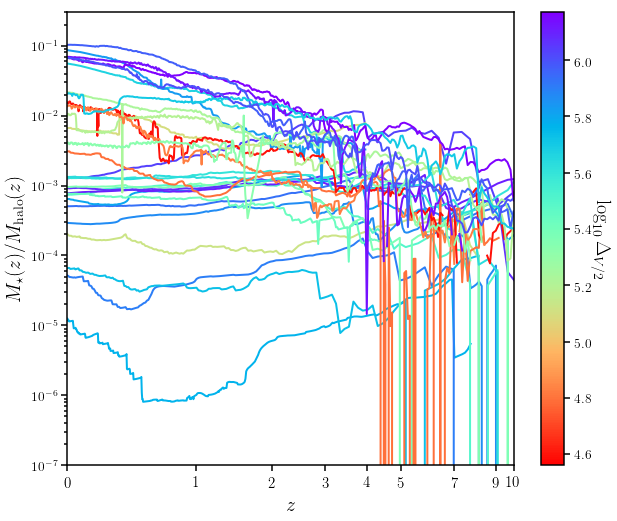

In [42]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        a = tree_scale[halo]
        redshift = 1./np.array(a) - 1.
        halomass = tree_halomass[halo]
        starmass = tree_starmass[halo]
        abund_z  = starmass/halomass
        w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
        color_frac = float(w[0])/(len(color_dV2)-1)
        ax.plot(redshift+1., abund_z, color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-7,3e-1)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\rm halo}(z)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

***

***

***

<a id='section:scatter'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Region of Largest Scatter: 
    $M_{\star}/M_{\rm halo} \in [0.4 - 3] \times 10^{-3}$
        </b> 
        </font>
</div>

<a id='subsection:scatterMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    MAHs
        </b> 
        </font>
</div> 

<a id='subsection:scatterMAHalpha'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $\alpha\ [1- 2 \%] \times R_{\rm vir}$
        </b> 
        </font>
</div> 

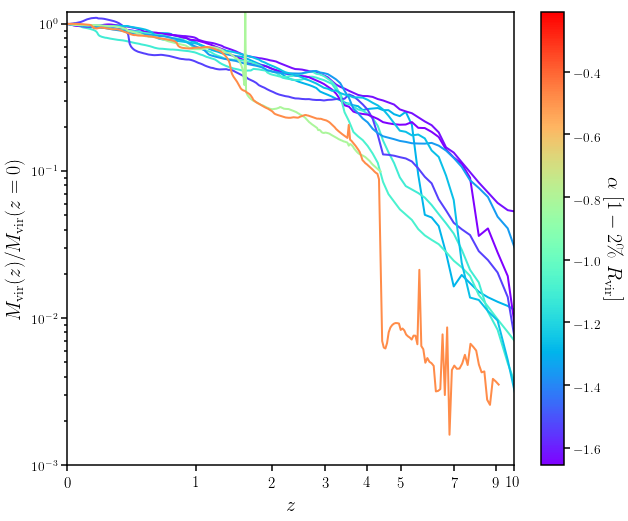

In [64]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            halomass = tree_halomass[halo]
            w = np.where(color_alpha == alpha_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_alpha)-1)
            ax.plot(redshift+1., halomass/halomass[0], color=cmap1(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm vir}(z)/M_{\rm vir}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterMAHratio'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $
        </b> 
        </font>
</div> 

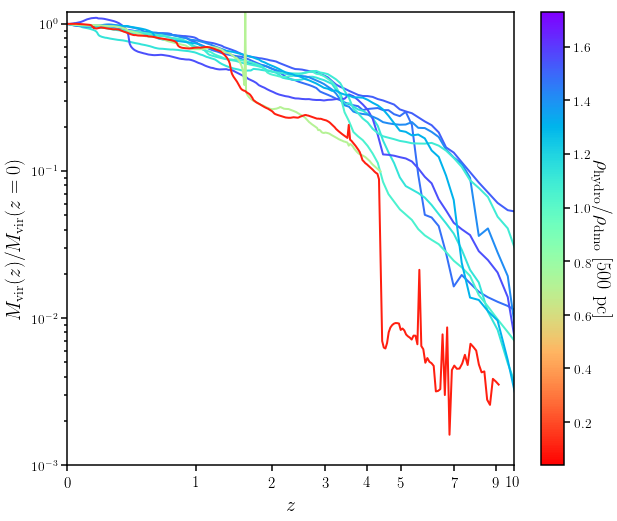

In [65]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            halomass = tree_halomass[halo]
            w = np.where(color_ratio == ratio500pc[halo])[0]
            color_frac = float(w[0])/(len(color_ratio)-1)
            ax.plot(redshift+1., halomass/halomass[0], color=cmap2(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm vir}(z)/M_{\rm vir}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterMAHV2'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $\Delta_{V/2}$
        </b> 
        </font>
</div> 

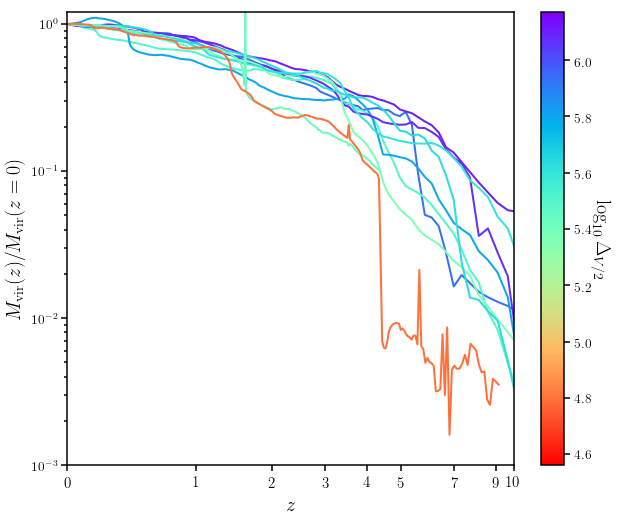

In [66]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            halomass = tree_halomass[halo]
            w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_dV2)-1)
            ax.plot(redshift+1., halomass/halomass[0], color=cmap2(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-3,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\rm vir}(z)/M_{\rm vir}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

***

<a id='subsection:scatterPWGH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    PWGHs
        </b> 
        </font>
</div> 

<a id='subsection:scatterPWGHalpha'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $\alpha\ [1- 2 \%] \times R_{\rm vir}$
        </b> 
        </font>
</div> 

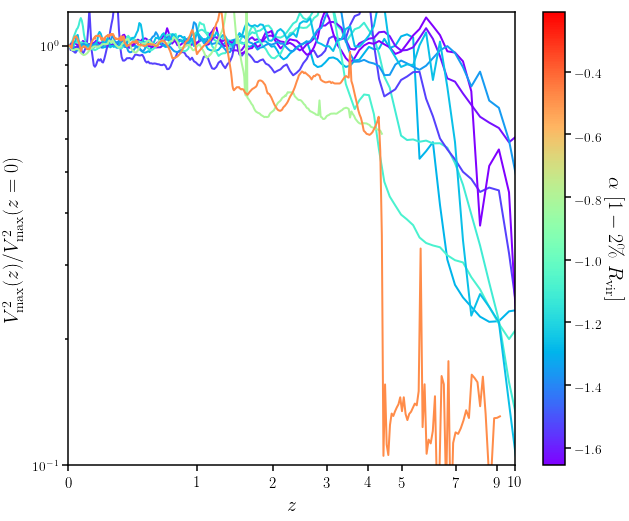

In [59]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            vmax2 = tree_vmax[halo]
            w = np.where(color_alpha == alpha_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_alpha)-1)
            ax.plot(redshift+1., vmax2/vmax2[0], color=cmap1(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterPWGHratio'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $
        </b> 
        </font>
</div> 

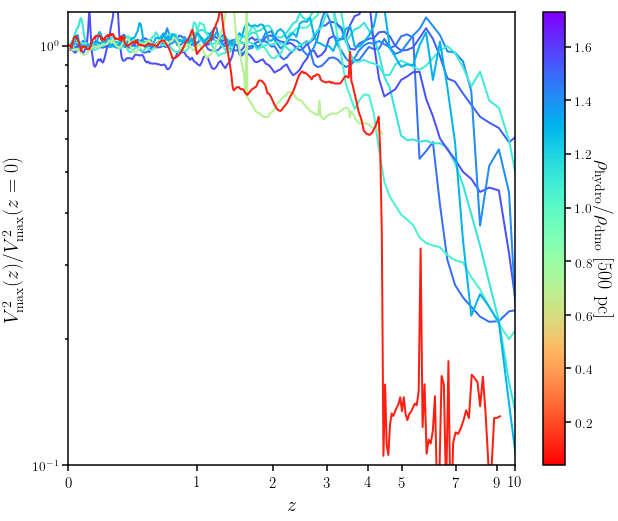

In [60]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            vmax2 = tree_vmax[halo]
            w = np.where(color_ratio == ratio500pc[halo])[0]
            color_frac = float(w[0])/(len(color_ratio)-1)
            ax.plot(redshift+1., vmax2/vmax2[0], color=cmap2(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterPWGHV2'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
   $\Delta_{V/2} $
        </b> 
        </font>
</div> 

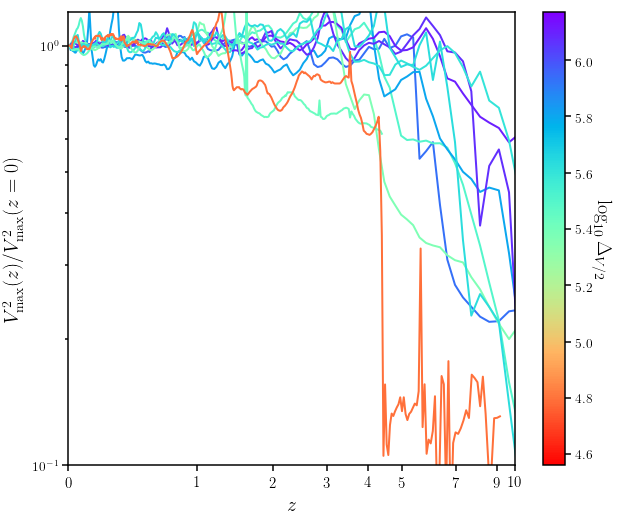

In [62]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            vmax2 = tree_vmax[halo]
            w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_dV2)-1)
            ax.plot(redshift+1., vmax2/vmax2[0], color=cmap2(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(0.1,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$V_{\rm max}^{2}(z)/V_{\rm max}^{2}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

***

<a id='subsection:scatterSMAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SMAHs
        </b> 
        </font>
</div> 

<a id='subsection:scatterSMAHalpha'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $\alpha\ [1- 2 \%] \times R_{\rm vir}$
        </b> 
        </font>
</div> 

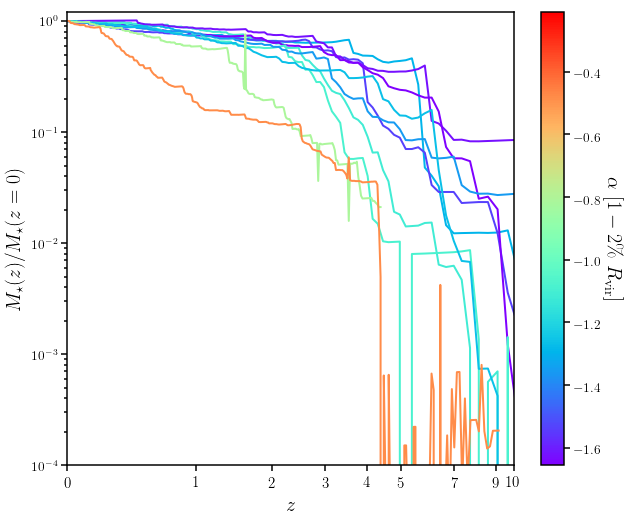

In [56]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            starmass = tree_starmass[halo]
            w = np.where(color_alpha == alpha_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_alpha)-1)
            ax.plot(redshift+1., starmass/starmass[0], color=cmap1(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterSMAHratio'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $
        </b> 
        </font>
</div> 

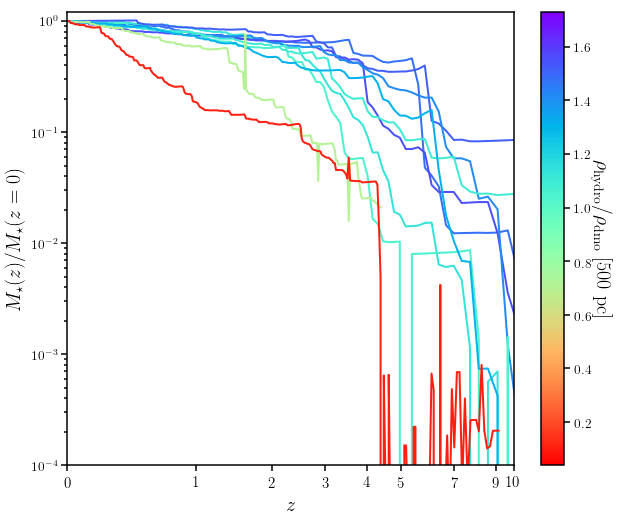

In [57]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            starmass = tree_starmass[halo]
            w = np.where(color_ratio == ratio500pc[halo])[0]
            color_frac = float(w[0])/(len(color_ratio)-1)
            ax.plot(redshift+1., starmass/starmass[0], color=cmap2(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterSMAHV2'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
   $\Delta_{V/2} $
        </b> 
        </font>
</div> 

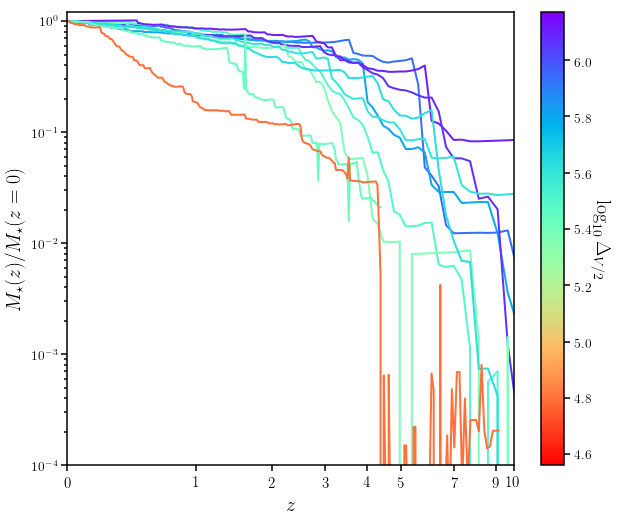

In [58]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            starmass = tree_starmass[halo]
            w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_dV2)-1)
            ax.plot(redshift+1., starmass/starmass[0], color=cmap2(color_frac), zorder=1)
            
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1.2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\star}(z=0)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

***

<a id='subsection:scatterSAAH'></a>

<div class="alert alert-success">
    <font size="4">
<b>
    SAAHs
        </b> 
        </font>
</div> 

<a id='subsection:scatterSAAHalpha'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $\alpha\ [1- 2 \%] \times R_{\rm vir}$
        </b> 
        </font>
</div> 

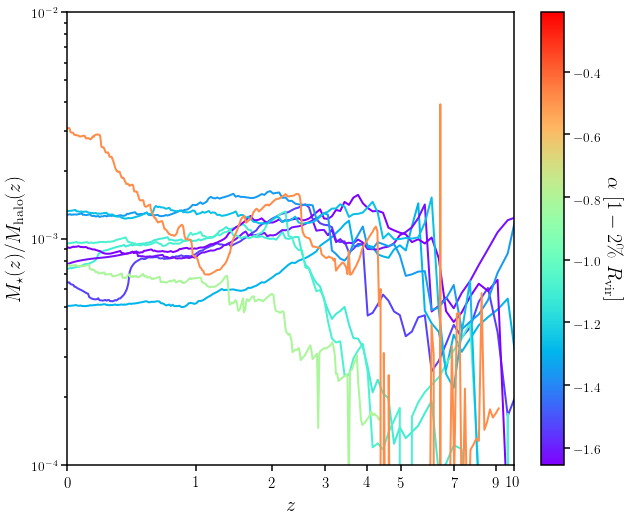

In [46]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            halomass = tree_halomass[halo]
            starmass = tree_starmass[halo]
            abund_z  = starmass/halomass
            w = np.where(color_alpha == alpha_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_alpha)-1)
            ax.plot(redshift+1., abund_z, color=cmap1(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1e-2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\rm halo}(z)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap1, vmin=cmin_alpha, vmax=cmax_alpha)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \alpha\ [1-2\%\ R_{\rm vir}] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterSAAHratio'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $
        </b> 
        </font>
</div> 

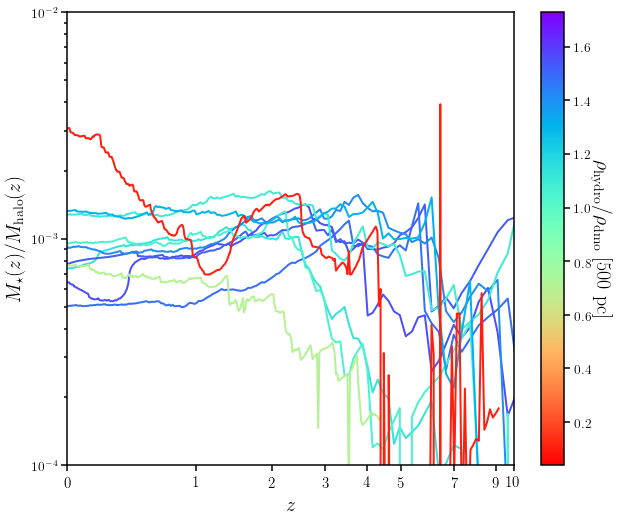

In [50]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            halomass = tree_halomass[halo]
            starmass = tree_starmass[halo]
            abund_z  = starmass/halomass
            w = np.where(color_ratio == ratio500pc[halo])[0]
            color_frac = float(w[0])/(len(color_ratio)-1)
            ax.plot(redshift+1., abund_z, color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1e-2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\rm halo}(z)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=cmin_ratio, vmax=cmax_ratio)
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \rho_{\rm hydro}/\rho_{\rm dmo}\ [\rm 500\ pc] $', fontsize=20, labelpad=20, rotation=270)

plt.show()

<a id='subsection:scatterSAAHV2'></a>

<div class="alert alert-danger">
    <font size="2.5">
<b>
    $\Delta_{V/2}$
        </b> 
        </font>
</div> 

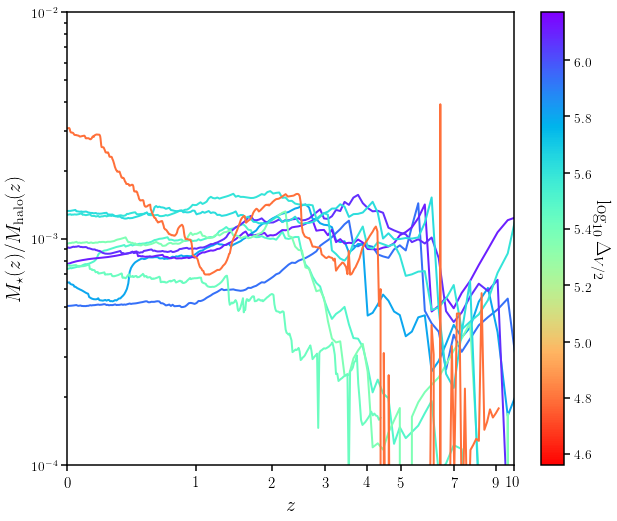

In [51]:
fig = plt.figure(figsize=(12/1.2,10/1.2))
ax = fig.add_subplot(111)

for halo in halo_name:
    try:
        tree_halomass[halo]
    except KeyError:
        pass
    else:
        if( 4e-4 <= abund[halo] <= 3e-3):
            a = tree_scale[halo]
            redshift = 1./np.array(a) - 1.
            halomass = tree_halomass[halo]
            starmass = tree_starmass[halo]
            abund_z  = starmass/halomass
            w = np.where(color_dV2 == deltaV2_hyd[halo])[0]
            color_frac = float(w[0])/(len(color_dV2)-1)
            ax.plot(redshift+1., abund_z, color=cmap2(color_frac), zorder=1)
    
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(1, 11)
ax.set_ylim(1e-4,1e-2)
 
ax.set_xlabel(r"$z$", fontsize=20)
ax.set_ylabel(r"$M_{\star}(z)/M_{\rm halo}(z)$", fontsize=20)

ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10, 11])
ax.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$', r'$4$', r'$5$', r'$7$', r'$9$', r'$10$'], fontsize=15)
ax.tick_params(axis='x', which='minor', bottom=False, top=False)

clr = ax.scatter(100,100,c=100, cmap=cmap2, vmin=np.log10(cmin_dV2), vmax=np.log10(cmax_dV2))
cbar = fig.colorbar(clr, ax=ax)
cbar.ax.set_ylabel(r'$ \log_{10}\Delta_{V/2} $', fontsize=20, labelpad=20, rotation=270)

plt.show()

***

***

***

<a id='section:reion'></a>

<div class="alert alert-info">
    <font size="6">
<b>
    Reionization Regime: 
    Time when $V_{\rm max} > 10\ \rm km\ s^{-1}$ ?
        </b> 
        </font>
</div>